In [1]:
#@title Importations

import random
import matplotlib.pyplot as plt

In [2]:
#@title Exercice 0.1

# Lecture d'un germe aléatoire entre 1 et 100
germe_valide = False
while not germe_valide:
    germe = int(input("Entrez le germe aléatoire (entre 1 et 100): "))
    germe_valide = germe >= 1 and germe <= 100

random.seed(germe)

# Génération des 1000 valeurs aléatoires
valeurs = []
for i in range(1000):
    valeur = random.randint(-1000, 999)
    valeurs.append(valeur)

In [3]:
#@title Exercice 0.2


def compter_inferieurs(liste_entiers, valeur_maximale):
    """
        Cette fonction compte le nombre de valeurs de liste_entiers strictement inférieures à
        valeur_maximale
    """
    nombre_inferieurs = 0
    for valeur in liste_entiers:
        if valeur < valeur_maximale:
            nombre_inferieurs += 1
    return nombre_inferieurs

nombre_valeurs = compter_inferieurs(valeurs, 30)
print(f"Il y a {nombre_valeurs} valeurs inférieures à 30")

Il y a 533 valeurs inférieures à 30


In [4]:
#@title Exercice 0.3

def separer_liste(originale, positifs, negatifs):
    """
        Fonction qui place dans positifs toutes les valeurs >= 0 et les autres dans negatifs.
        La liste originale n'est pas modifiée.
    """
    for valeur in originale:
        if valeur < 0:
            negatifs.append(valeur)
        else:
            positifs.append(valeur)

valeurs_positives = []
valeurs_negatives = []
separer_liste(valeurs, valeurs_positives, valeurs_negatives)

print(f"Il y a {len(valeurs_positives)} valeurs positives et {len(valeurs_negatives)} valeurs négatives.")

Il y a 479 valeurs positives et 521 valeurs négatives.


In [5]:
#@title Exercice 0.4

with open("positives.txt", "w") as fichier_positif:
    for valeur in valeurs_positives:
        print(valeur, file=fichier_positif)

with open("negatives.txt", "w") as fichier_negatifs:
    for valeur in valeurs_negatives:
        print(valeur, file=fichier_negatifs)


In [6]:
#@title Exercice 0.5

def somme_trois_plus_grands(liste_entiers):
    """
        Fonction qui fait la somme des trois valeurs les plus grandes de liste_entiers.
        La liste n'est pas modifiée.
    """
    somme = 0
    indice_exclus = []
    for compteur in range(3):
        valeur_max = min(liste_entiers) - 1
        indice_candidat = 0
        for i in range(len(liste_entiers)):
            if liste_entiers[i] > valeur_max and i not in indice_exclus:
                indice_candidat = i
                valeur_max = liste_entiers[i]
        somme += valeur_max
        indice_exclus.append(indice_candidat)
    return somme

somme_positive = somme_trois_plus_grands(valeurs_positives)
somme_negative = somme_trois_plus_grands(valeurs_negatives)

print(f"La somme des trois plus grand positifs est: {somme_positive}")
print(f"La somme des trois plus grands négatifs est: {somme_negative}")

La somme des trois plus grand positifs est: 2992
La somme des trois plus grands négatifs est: -15


In [7]:
#@title Exercice 0.6

def compter_lignes(nom_fichier):
    """
        Fonction qui compte le nombre de lignes dans le fichier
    """
    nb_lignes = 0
    with open(nom_fichier, "r") as fic:
        for ligne in fic:
            nb_lignes += 1
    return nb_lignes

def enlever_doublons(nom_fichier_entiers):
    """
        Fonction qui crée un nouveau fichier à partir du nom du fichier et
        y copie toutes les valeurs de fichier_entiers, sauf les doublons.
    """
    valeur_retenus = []   # Pour ne pas avoir de doublons
    with open(nom_fichier_entiers) as fic:
        for ligne in fic:
            valeur = int(ligne)
            if valeur not in valeur_retenus:
                valeur_retenus.append(valeur)

    # On crée le nom du nouveau fichier à partir de nom_fichier_entiers    
    position_point = nom_fichier_entiers.index(".")
    extension = nom_fichier_entiers[position_point+1:]
    nouveau_nom = nom_fichier_entiers[:position_point] + "_singleton"+ "." + extension

    # On écrit les valeurs
    with open(nouveau_nom, "w") as nouveau_fic:
        for valeur in valeur_retenus:
            print(valeur, file=nouveau_fic)

enlever_doublons("positives.txt")
enlever_doublons("negatives.txt")

print(f"Le fichier positives_singleton.txt contient {compter_lignes("positives_singleton.txt")} valeurs.")
print(f"Le fichier negatives_singleton.txt contient {compter_lignes("negatives_singleton.txt")} valeurs.")


Le fichier positives_singleton.txt contient 376 valeurs.
Le fichier negatives_singleton.txt contient 402 valeurs.


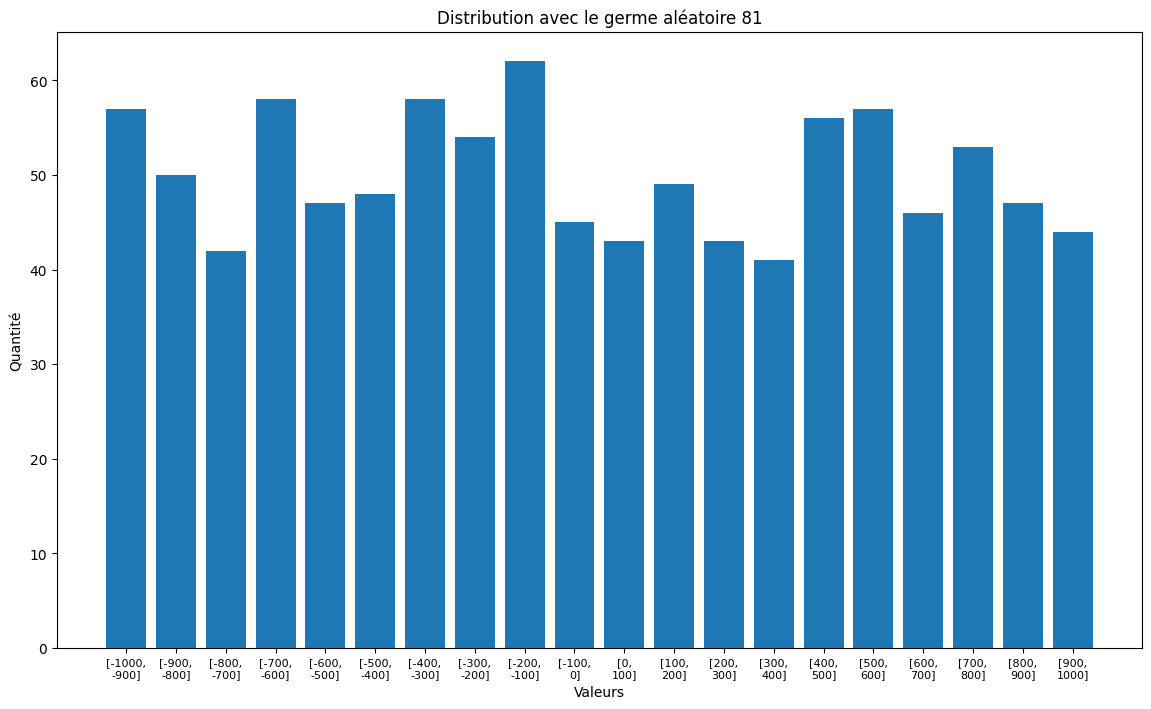

In [8]:
#@title Exercice 0.7

etiquettes_x = [f"[{x},\n{x+100}]" for x in range(-1000, 1000, 100)]
quantites = [0] * 20   # Pour partager les valeurs, de -1000 à 1000, par tranche de 100

for valeur in valeurs:
    indice = (valeur + 1000) // 100    # -1000 est à l'indice 0, -901 est à l'indice 0, -900 à l'indice 1... et 900 à 999 à l'indice 19
    quantites[indice] = quantites[indice]  + 1

plt.figure(figsize=(14,8))
plt.title(f"Distribution avec le germe aléatoire {germe}")
plt.bar(etiquettes_x, quantites)
plt.xticks(fontsize=8)
plt.xlabel("Valeurs")
plt.ylabel("Quantité", rotation=90)

plt.show()